# Health Nutrition and Population Statistics Test

This notebook tests the download and loading of the World Bank Health, Nutrition and Population Statistics dataset from Kaggle.

In [1]:
!pip install kagglehub pandas matplotlib seaborn

In [2]:
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import shutil

# Download and copy to local directory
print("Downloading World Bank Health, Nutrition and Population Statistics...")
cache_path = kagglehub.dataset_download("theworldbank/health-nutrition-and-population-statistics")
current_dir = os.getcwd()
local_data_dir = current_dir
os.makedirs(local_data_dir, exist_ok=True)

for file in os.listdir(cache_path):
    src = os.path.join(cache_path, file)
    dst = os.path.join(local_data_dir, file)
    shutil.copy2(src, dst)
    print(f"Copied {file}")

path = local_data_dir

/home/tamim/ai4ph/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 14.0M/14.0M [00:17<00:00, 861kB/s] 

Extracting files...


Copied data.csv


Dataset shape: (89010, 61)
Columns: ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', 'Unnamed: 60']
  Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   
3   Arab World          ARB   
4   Arab World          ARB   

                                      Indicator Name     Indicator Code  \
0  % of females ages 15-49 having comprehensive c...  SH.HIV.KNOW.FE.ZS   
1  % of males ages 15-49 having comprehensive cor...  SH.HIV.KNOW.MA.ZS   
2  Adolescent fertil

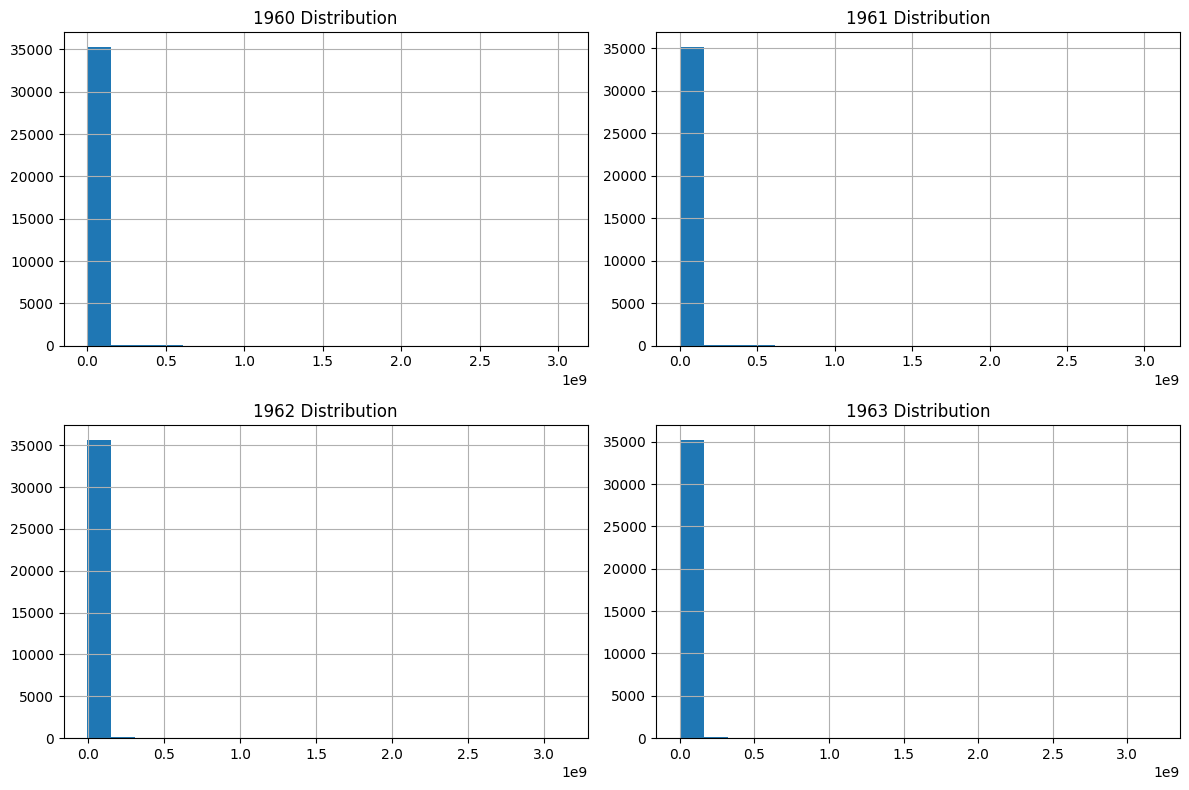

In [3]:
# Load and analyze nutrition/population data
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
if csv_files:
    # Load first CSV file
    df = pd.read_csv(os.path.join(path, csv_files[0]))
    print(f"Dataset shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    print(df.head())
    
    # Look for nutrition and health indicators
    nutrition_cols = [col for col in df.columns if any(keyword in col.lower() 
                     for keyword in ['nutrition', 'malnutrition', 'stunting', 'underweight'])]
    
    if nutrition_cols:
        print(f"\nNutrition indicators found: {nutrition_cols[:5]}")
    
    # Create visualizations for key indicators
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    if len(numeric_cols) > 0:
        fig, axes = plt.subplots(2, 2, figsize=(12, 8))
        axes = axes.ravel()
        
        for i, col in enumerate(numeric_cols[:4]):
            if i < len(axes):
                data = df[col].dropna()
                if len(data) > 0:
                    data.hist(bins=20, ax=axes[i])
                    axes[i].set_title(f'{col} Distribution')
        
        plt.tight_layout()
        plt.show()

In [4]:
print("✅ Nutrition and Population Statistics dataset ready!")
print(f"- Location: {path}")
if csv_files:
    print(f"- Records: {df.shape[0]:,}")
    print(f"- Indicators: {df.shape[1]}")
print("- Use case: Global nutrition analysis, population health trends, malnutrition research")
print("- Perfect for: Module 4 (Data Visualization), Module 7 (Public Health Modeling), Module 8 (Surveillance)")

✅ Nutrition and Population Statistics dataset ready!
- Location: /home/tamim/ai4ph/data/nutrition_population_stats
- Records: 89,010
- Indicators: 61
- Use case: Global nutrition analysis, population health trends, malnutrition research
- Perfect for: Module 4 (Data Visualization), Module 7 (Public Health Modeling), Module 8 (Surveillance)
